In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""
Preprocessing is a crucial step in deep learning to ensure that your data is in a suitable format and condition for training your neural network. The specific preprocessing steps you need to perform depend on your dataset and the nature of your deep learning task. However, here are some common preprocessing steps often applied in deep learning:

Data Cleaning:

Handling Missing Values: Decide how to deal with missing data, either by filling in missing values with a specific value (e.g., mean or median) or removing rows or columns with missing data.
Outlier Detection and Handling: Identify and address outliers in your dataset, which can affect model performance.
Data Normalization/Scaling:

Standardization: Scale features to have a mean of 0 and a standard deviation of 1. This helps when features have different scales.
Min-Max Scaling: Scale features to a specific range, often between 0 and 1.
Log Transformation: Apply a logarithm to data to reduce skewness in distributions.
Feature Engineering:

Create new features that may be relevant for your problem.
Encode categorical variables as numerical values (e.g., one-hot encoding or label encoding).
Data Splitting:

Split your dataset into training, validation, and test sets. This allows you to evaluate your model's performance effectively and avoid overfitting.
Data Augmentation (mainly for computer vision tasks):

Generate new training samples by applying random transformations (e.g., rotations, flips, zooms) to the existing data to increase the diversity of the training set.
Text Preprocessing (for natural language processing tasks):

Tokenization: Split text into words or subword tokens.
Padding: Ensure that all sequences are of the same length by padding or truncating.
Text Vectorization: Convert words or tokens into numerical vectors using techniques like Word2Vec, TF-IDF, or embeddings.
Image Preprocessing (for computer vision tasks):

Resizing: Ensure that all images have the same dimensions.
Normalization: Scale pixel values to a consistent range (e.g., [0, 1] or [-1, 1]).
Data Augmentation: Apply random transformations to the images to increase the training dataset's diversity.
Time Series Preprocessing (for time series forecasting tasks):

Resampling: Adjust the frequency of your time series data (e.g., from hourly to daily).
Lag Features: Create lag features to capture temporal dependencies.
Windowing: Split time series data into overlapping or non-overlapping windows.
Handling Imbalanced Classes:

Address class imbalance issues by oversampling the minority class, undersampling the majority class, or using specialized techniques like SMOTE.
Data Encoding for Neural Networks:

Convert your preprocessed data into tensors or appropriate data structures suitable for input to neural networks.
Data Pipeline:

Set up a data pipeline to efficiently load, preprocess, and feed data to your deep learning model in batches.
Data Exploration and Visualization:

Explore your data to gain insights into its distribution, relationships, and potential issues. Visualization can help in this regard.
"""

In [2]:
"""
The pandas.read_csv() function in the Pandas library is used to read data from a CSV (Comma-Separated Values) file and return it as a DataFrame, which is one of the fundamental data structures in Pandas.
A DataFrame is a two-dimensional, tabular data structure that resembles a spreadsheet or database table.
"""
insurance_dataframe = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
"""
example for one hot encoding
# Create a DataFrame with a categorical column
data = {'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']}
df = pd.DataFrame(data)

# Perform one-hot encoding
one_hot = pd.get_dummies(df['Color'])

# The resulting one-hot encoded DataFrame:
print(one_hot)
"""
one_hot_insurance_dataframe = pd.get_dummies(insurance_dataframe)
one_hot_insurance_dataframe

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
# return first n rows of data frame
one_hot_insurance_dataframe.head(4)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0


In [9]:
# create features and labels (inputs and outputs)
# The axis=1 argument indicates that we want to drop a column (as opposed to dropping a row).
# axis=0 is for drop a row in specific index ex: drop(2, axis=0)
X = one_hot_insurance_dataframe.drop('charges', axis=1)
y = one_hot_insurance_dataframe['charges']

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [11]:
# create training and test sets using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [12]:
# Build neural network
insurance_model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# fit the model
# do not need to pass as tensors, we can directly pass as pandas dataframe because dataframe is already built in top of numpy arrays
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8735.8535 - mae: 8735.8535
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7672.5444 - mae: 7672.5444
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7786.6631 - mae: 7786.6631
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7613.0024 - mae: 7613.0024
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7482.8657 - mae: 7482.8657
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7495.0811 - mae: 7495.0811
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7866.2056 - mae: 7866.2056
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7794.9043 - mae: 7794.9043
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7788.5786 - mae: 7788.5786
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7749.0239 - mae: 7749.0239

In [13]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7689.6738 - mae: 7689.6738


[7689.673828125, 7689.673828125]

In [25]:
import numpy as np
y_predections = insurance_model.predict(X_test)
y_predections

9/9 [==============================] - 0s 4ms/step


array([[ 6638.181  ],
       [ 3826.9028 ],
       [12033.041  ],
       [ 6975.476  ],
       [ 3435.5444 ],
       [ 3170.314  ],
       [  964.341  ],
       [ 8651.084  ],
       [ 2994.6692 ],
       [ 7418.325  ],
       [ 6831.256  ],
       [ 5464.6177 ],
       [ 3056.523  ],
       [ 9345.408  ],
       [10802.084  ],
       [ 9264.096  ],
       [ 6658.2124 ],
       [ 9017.858  ],
       [ 6266.847  ],
       [ 8140.4893 ],
       [ 3823.7065 ],
       [ 5632.344  ],
       [  472.73862],
       [ 1016.85724],
       [ 7688.3286 ],
       [ 7222.3066 ],
       [ 7954.507  ],
       [ 3337.3955 ],
       [ 6954.112  ],
       [  535.9125 ],
       [ 6061.4307 ],
       [ 7650.057  ],
       [  972.86127],
       [ 4295.2544 ],
       [ 2183.4148 ],
       [ 5217.4004 ],
       [ 1457.7577 ],
       [ 5401.1016 ],
       [10312.43   ],
       [ 6971.154  ],
       [ 2593.572  ],
       [ 1515.7843 ],
       [ 7583.9355 ],
       [ 8202.77   ],
       [ 3896.1738 ],
       [ 8

In [28]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predections)

# Calculate the Percentage Error
percentage_error = (mae / np.mean(y_test)) * 100
percentage_error

59.295850340184316

In [30]:
# improve model
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13261.7793 - mae: 13261.7793
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13045.1396 - mae: 13045.1396
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12617.4980 - mae: 12617.4980
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11828.5000 - mae: 11828.5000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10586.8115 - mae: 10586.8115
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9111.6113 - mae: 9111.6113
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7899.4785 - mae: 7899.4785
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7458.3594 - mae: 7458.3594
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7399.5806 - mae: 7399.5806
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7379.5166 - mae:

In [31]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4552.7896 - mae: 4552.7896


[4552.78955078125, 4552.78955078125]

In [32]:
mae_2 = mean_absolute_error(y_test, insurance_model_2.predict(X_test))

percentage_error_model_2 = (mae_2 / np.mean(y_test)) * 100
percentage_error_model_2

9/9 [==============================] - 1s 8ms/step


35.107021105962545

In [35]:
# improve model
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history_of_model_3 = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13310.0410 - mae: 13310.0410
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13195.9795 - mae: 13195.9795
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12940.8545 - mae: 12940.8545
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12406.1777 - mae: 12406.1777
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11439.6016 - mae: 11439.6016
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10046.1719 - mae: 10046.1719
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8585.3916 - mae: 8585.3916
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7662.4780 - mae: 7662.4780
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7446.7119 - mae: 7446.7119
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7420.5430 - ma

In [36]:
mae_3 = mean_absolute_error(y_test, insurance_model_3.predict(X_test))

percentage_error_model_3 = (mae_3 / np.mean(y_test)) * 100
percentage_error_model_3

9/9 [==============================] - 0s 2ms/step


27.04593447350041

Text(0.5, 0, 'epochs')

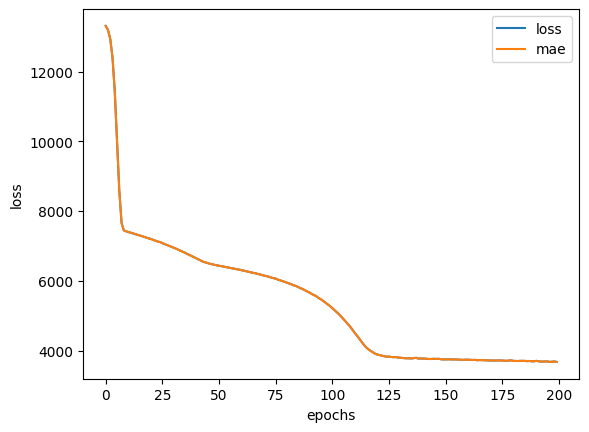

In [37]:
# plot history of training (loss curve or training curve)
pd.DataFrame(history_of_model_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [38]:
# Early stopping callback in tensorflow - stops training when the model stops improving on specific epochs

In [43]:
# improve model
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

history_of_model_4 = insurance_model_4.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 11241.5938 - mae: 11241.5938
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 7497.9058 - mae: 7497.9058
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7266.6011 - mae: 7266.6011
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7028.8496 - mae: 7028.8496
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 6783.4946 - mae: 6783.4946
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 6509.1523 - mae: 6509.1523
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6372.5581 - mae: 6372.5581
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6223.0703 - mae: 6223.0703
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6065.3145 - mae: 6065.3145
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 5870.1987 - mae: 5870.19

In [44]:
mae_4 = mean_absolute_error(y_test, insurance_model_4.predict(X_test))

percentage_error_model_4 = (mae_4 / np.mean(y_test)) * 100
percentage_error_model_4

9/9 [==============================] - 0s 2ms/step


24.55019724968042

In [47]:
# preprocessing (normalization and standardization)
# normalization
# - MinMaxScaler from scikitLearn - without changing distribution it scales between 0 and 1
insurance_dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
    )

# create feature and labels
X_new = insurance_dataframe.drop('charges', axis=1)
y_new = insurance_dataframe['charges']

# train and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# fit column transformer to training data
ct.fit(X_train_new)

# transform training and test data with MinMazScaler and OneHotEncoder
X_train_normalized = ct.transform(X_train_new)
X_test_normalized = ct.transform(X_test_new)

In [50]:
X_train_normalized[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [54]:
X_train_new.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

<Axes: ylabel='Frequency'>

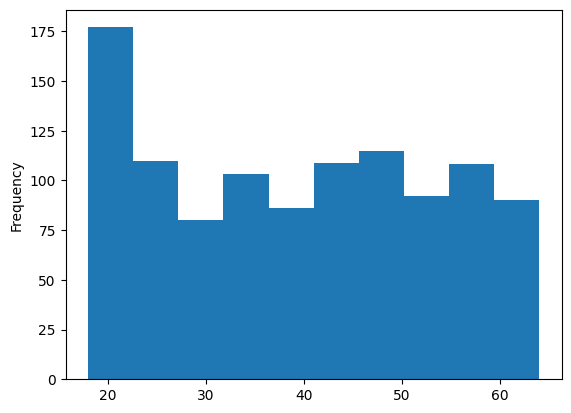

In [58]:
X_train_new['age'].plot(kind='hist')

In [61]:
X_train_normalized

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [63]:
tf.random.set_seed(42)

insurance_model_5 = tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history_of_model_5 = insurance_model_5.fit(X_train_normalized, y_train_new, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13343.6016 - mae: 13343.6016
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13333.8408 - mae: 13333.8408
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13310.5684 - mae: 13310.5684
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13262.5654 - mae: 13262.5654
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13178.1660 - mae: 13178.1660
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13046.0381 - mae: 13046.0381
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12855.7734 - mae: 12855.7734
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12597.4111 - mae: 12597.4111
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12260.9385 - mae: 12260.9385
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11844.72

In [64]:
mae_5 = mean_absolute_error(y_test_new, insurance_model_5.predict(X_test_normalized))

percentage_error_model_5 = (mae_5 / np.mean(y_test_new)) * 100
percentage_error_model_5

9/9 [==============================] - 0s 2ms/step


24.42949790872435